In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import statistics

%matplotlib inline

In [2]:
mnist= fetch_mldata("MNIST original")
X, y= mnist["data"], mnist["target"]

In [3]:
X_train, X_test, y_train, y_test= X[:60000], X[60000:], y[:60000], y[60000:]

In [4]:
shuffle_index= np.random.permutation(len(X_train))

In [5]:
X_train, y_train= X_train[shuffle_index], y_train[shuffle_index]

In [ ]:
knn_clf= KNeighborsClassifier()

grid_params= [{'weights':['uniform', 'distance'], 'n_neighbors': [4, 8, 12, 16, 20, 24, 28]}]

knn_clf= KNeighborsClassifier()
grid_search= GridSearchCV(knn_clf, grid_params, cv=5, verbose=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


In [6]:
from scipy.ndimage.interpolation import shift

def shift_image(image, dx, dy):
    image= image.reshape(28, 28)
    shifted_image= shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

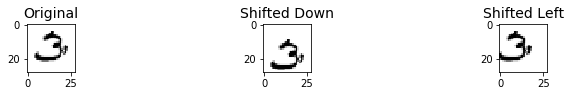

In [7]:
image= X_train[10000]
shifted_down= shift_image(image, 0,5)
shifted_left= shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(331)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28,28), interpolation='nearest', cmap='Greys')
plt.subplot(332)
plt.title("Shifted Down", fontsize=14)
plt.imshow(shifted_down.reshape(28,28), interpolation='nearest', cmap='Greys')
plt.subplot(333)
plt.title("Shifted Left", fontsize=14)
plt.imshow(shifted_left.reshape(28,28), interpolation='nearest', cmap='Greys')
plt.show()

In [8]:
X_train_augmented= [image for image in X_train]
y_train_augmented= [label for label in y_train]

for dx, dy in ((1,0), (-1, 0), (0,1), (0,-1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)
        
X_train_augmented= np.array(X_train_augmented)
y_train_augmented= np.array(y_train_augmented)

In [10]:
shuffle_idx= np.random.permutation(len(X_train_augmented))
X_train_augmented= X_train_augmented[shuffle_idx]
y_train_augmented= y_train_augmented[shuffle_idx]

In [12]:
knn_clf= KNeighborsClassifier(n_neighbors=4, p=2, weights='distance')

In [13]:
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance')

In [14]:
y_pred= knn_clf.predict(X_test)

In [16]:
accuracy_score(y_test, y_pred)

0.9763

In [110]:
# Titanic Data

train_data= pd.read_csv("./titanic/train.csv")
test_data= pd.read_csv("./titanic/test.csv")

In [111]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [112]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [113]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [114]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [115]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [116]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [117]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [118]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [119]:
var= list(train_data.columns)
var

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [120]:
def check_na(obs_name):
    for i in range(len(obs_name)):
        print(obs_name[i])
        print(train_data[obs_name[i]].isna().value_counts(), "\n")

In [121]:
check_na(var)

PassengerId
False    891
Name: PassengerId, dtype: int64 

Survived
False    891
Name: Survived, dtype: int64 

Pclass
False    891
Name: Pclass, dtype: int64 

Name
False    891
Name: Name, dtype: int64 

Sex
False    891
Name: Sex, dtype: int64 

Age
False    714
True     177
Name: Age, dtype: int64 

SibSp
False    891
Name: SibSp, dtype: int64 

Parch
False    891
Name: Parch, dtype: int64 

Ticket
False    891
Name: Ticket, dtype: int64 

Fare
False    891
Name: Fare, dtype: int64 

Cabin
True     687
False    204
Name: Cabin, dtype: int64 

Embarked
False    889
True       2
Name: Embarked, dtype: int64 



In [122]:
median_age=np.nanmedian(train_data['Age'])

train_data['Age'].fillna(median_age, inplace=True)

In [123]:
train_data['Embarked'].fillna(statistics.mode(train_data['Embarked']), inplace=True)

In [124]:
train_data.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [125]:
X_train= train_data.drop('Survived', axis=1)
y_train= train_data['Survived']

In [126]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

X_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [127]:
lab_enc=LabelEncoder()
X_train['Embarked']=lab_enc.fit_transform(X_train['Embarked'])
X_train['Sex']=lab_enc.fit_transform(X_train['Sex'])

In [128]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [129]:
from sklearn.svm import SVC

svm_clf= SVC(gamma='auto')

svm_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [130]:
def check_na_t(obs_name):
    for i in range(len(obs_name)):
        print(obs_name[i])
        print(test_data[obs_name[i]].isna().value_counts(), "\n")

In [131]:
check_na_t(test_data.columns)

PassengerId
False    418
Name: PassengerId, dtype: int64 

Pclass
False    418
Name: Pclass, dtype: int64 

Name
False    418
Name: Name, dtype: int64 

Sex
False    418
Name: Sex, dtype: int64 

Age
False    332
True      86
Name: Age, dtype: int64 

SibSp
False    418
Name: SibSp, dtype: int64 

Parch
False    418
Name: Parch, dtype: int64 

Ticket
False    418
Name: Ticket, dtype: int64 

Fare
False    417
True       1
Name: Fare, dtype: int64 

Cabin
True     327
False     91
Name: Cabin, dtype: int64 

Embarked
False    418
Name: Embarked, dtype: int64 



In [132]:
median_age=np.nanmedian(test_data['Age'])

test_data['Age'].fillna(median_age, inplace=True)

In [133]:
pasengers= test_data['PassengerId']
test_data.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [134]:
median_fare=np.nanmedian(test_data['Fare'])

test_data['Fare'].fillna(median_fare, inplace=True)

In [135]:
test_data['Embarked']=lab_enc.fit_transform(test_data['Embarked'])
test_data['Sex']=lab_enc.fit_transform(test_data['Sex'])

In [136]:
y_pred= svm_clf.predict(test_data)

In [137]:
from sklearn.model_selection import cross_val_score

svm_score= cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_score.mean()

0.7095823402564976

In [144]:
op= pd.DataFrame(np.c_[pasengers, y_pred])
op.columns=['PassengerId','Survived']

In [145]:
op

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0
5,897,0
6,898,0
7,899,1
8,900,0
9,901,1


In [149]:
op.to_csv('./titanic/pred1.csv', sep=',', index=False)

In [150]:
from sklearn.ensemble import RandomForestClassifier

rfe_clf= RandomForestClassifier(n_estimators=100, random_state=123)
rfe_scores= cross_val_score(rfe_clf, X_train, y_train, cv=10)
rfe_scores.mean()

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.8115818295312678

In [151]:
rfe_clf.fit(X_train, y_train)
y_pred= rfe_clf.predict(test_data)

In [152]:
op= pd.DataFrame(np.c_[pasengers, y_pred])
op.columns=['PassengerId','Survived']
op.to_csv('./titanic/pred2.csv', sep=',', index=False)

In [157]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

params_distribs= { 
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=7)
}

rfe_clf= RandomForestClassifier(random_state=123)
rnd_search= RandomizedSearchCV(rfe_clf, param_distributions=params_distribs, n_iter=100, 
                               cv=10, random_state=123, scoring='accuracy')
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001EDE634F400>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001EDE634F0B8>},
          pre_dispatch='2*n_jobs', random_state=123, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [164]:
cv_res= rnd_search.cv_results_
for test_score, params in zip(cv_res["mean_test_score"], cv_res["params"]):
    print(np.sqrt(test_score), params)

0.90267093384844 {'max_features': 6, 'n_estimators': 127}
0.9063933040070528 {'max_features': 3, 'n_estimators': 99}
0.9001808023903551 {'max_features': 2, 'n_estimators': 84}
0.9045340337332909 {'max_features': 3, 'n_estimators': 124}
0.9008039805905674 {'max_features': 2, 'n_estimators': 97}
0.8989331499509894 {'max_features': 2, 'n_estimators': 127}
0.8983086739117798 {'max_features': 2, 'n_estimators': 33}
0.8958064164776166 {'max_features': 1, 'n_estimators': 112}
0.9001808023903551 {'max_features': 2, 'n_estimators': 84}
0.9032923941174765 {'max_features': 6, 'n_estimators': 165}
0.8964326356498501 {'max_features': 1, 'n_estimators': 69}
0.8983086739117798 {'max_features': 2, 'n_estimators': 56}
0.8882573514103081 {'max_features': 4, 'n_estimators': 3}
0.9020490454288763 {'max_features': 5, 'n_estimators': 40}
0.9032923941174765 {'max_features': 3, 'n_estimators': 85}
0.8964326356498501 {'max_features': 1, 'n_estimators': 190}
0.8970584176706692 {'max_features': 1, 'n_estimators'

In [167]:
rfe_clf= RandomForestClassifier(n_estimators=102, max_features=3, random_state=123)
rfe_clf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=102, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [168]:
y_pred= rfe_clf.predict(test_data)

In [169]:
op= pd.DataFrame(np.c_[pasengers, y_pred])
op.columns=['PassengerId','Survived']
op.to_csv('./titanic/pred3.csv', sep=',', index=False)

In [170]:
# SPAM Detection 

import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "http://spamassassin.apache.org/old/publiccorpus/"
HAM_URL = DOWNLOAD_ROOT + "20030228_easy_ham.tar.bz2"
SPAM_URL = DOWNLOAD_ROOT + "20030228_spam.tar.bz2"
SPAM_PATH = os.path.join("datasets", "spam")

def fetch_spam_data(spam_url=SPAM_URL, spam_path=SPAM_PATH):
    if not os.path.isdir(spam_path):
        os.makedirs(spam_path)
    for filename, url in (("ham.tar.bz2", HAM_URL), ("spam.tar.bz2", SPAM_URL)):
        path = os.path.join(spam_path, filename)
        if not os.path.isfile(path):
            urllib.request.urlretrieve(url, path)
        tar_bz2_file = tarfile.open(path)
        tar_bz2_file.extractall(path=SPAM_PATH)
        tar_bz2_file.close()

In [171]:
fetch_spam_data()

In [172]:
HAM_DIR = os.path.join(SPAM_PATH, "easy_ham")
SPAM_DIR = os.path.join(SPAM_PATH, "spam")
ham_filenames = [name for name in sorted(os.listdir(HAM_DIR)) if len(name) > 20]
spam_filenames = [name for name in sorted(os.listdir(SPAM_DIR)) if len(name) > 20]

In [173]:

len(ham_filenames)

2500

In [174]:
len(spam_filenames)

500

In [179]:
import email
import email.policy

def load_email(is_spam, filename, spam_path=SPAM_PATH):
    directory= "spam" if is_spam else "easy_ham"
    with open(os.path.join(spam_path, directory, filename), 'rb') as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)

In [180]:
ham_emails= [load_email(is_spam=False, filename=name) for name in ham_filenames]
spam_emails= [load_email(is_spam=True, filename=name) for name in spam_filenames]

In [181]:
print(ham_emails[1].get_content().strip())

Martin A posted:
Tassos Papadopoulos, the Greek sculptor behind the plan, judged that the
 limestone of Mount Kerdylio, 70 miles east of Salonika and not far from the
 Mount Athos monastic community, was ideal for the patriotic sculpture. 
 
 As well as Alexander's granite features, 240 ft high and 170 ft wide, a
 museum, a restored amphitheatre and car park for admiring crowds are
planned
---------------------
So is this mountain limestone or granite?
If it's limestone, it'll weather pretty fast.

------------------------ Yahoo! Groups Sponsor ---------------------~-->
4 DVDs Free +s&p Join Now
http://us.click.yahoo.com/pt6YBB/NXiEAA/mG3HAA/7gSolB/TM
---------------------------------------------------------------------~->

To unsubscribe from this group, send an email to:
forteana-unsubscribe@egroups.com

 

Your use of Yahoo! Groups is subject to http://docs.yahoo.com/info/terms/


In [182]:
print(spam_emails[1].get_content().strip())

1) Fight The Risk of Cancer!
http://www.adclick.ws/p.cfm?o=315&s=pk007

2) Slim Down - Guaranteed to lose 10-12 lbs in 30 days
http://www.adclick.ws/p.cfm?o=249&s=pk007

3) Get the Child Support You Deserve - Free Legal Advice
http://www.adclick.ws/p.cfm?o=245&s=pk002

4) Join the Web's Fastest Growing Singles Community
http://www.adclick.ws/p.cfm?o=259&s=pk007

5) Start Your Private Photo Album Online!
http://www.adclick.ws/p.cfm?o=283&s=pk007

Have a Wonderful Day,
Offer Manager
PrizeMama













If you wish to leave this list please use the link below.
http://www.qves.com/trim/?ilug@linux.ie%7C17%7C114258


-- 
Irish Linux Users' Group: ilug@linux.ie
http://www.linux.ie/mailman/listinfo/ilug for (un)subscription information.
List maintainer: listmaster@linux.ie


In [183]:
def get_email_structure(email):
    if isinstance(email, str):
        return email
    payload= email.get_payload()
    if isinstance(payload, list):
        return "multipart({})".format(", ".join([
            get_email_structure(sub_email)
            for sub_email in payload
        ]))
    else:
        return email.get_content_type()

In [184]:
from collections import Counter

def structures_counter(emails):
    structures= Counter()
    for email in emails:
        structure= get_email_structure(email)
        structures[structure]+=1
    return structures

In [186]:
structures_counter(ham_emails).most_common()

[('text/plain', 2408),
 ('multipart(text/plain, application/pgp-signature)', 66),
 ('multipart(text/plain, text/html)', 8),
 ('multipart(text/plain, text/plain)', 4),
 ('multipart(text/plain)', 3),
 ('multipart(text/plain, application/octet-stream)', 2),
 ('multipart(text/plain, text/enriched)', 1),
 ('multipart(text/plain, application/ms-tnef, text/plain)', 1),
 ('multipart(multipart(text/plain, text/plain, text/plain), application/pgp-signature)',
  1),
 ('multipart(text/plain, video/mng)', 1),
 ('multipart(text/plain, multipart(text/plain))', 1),
 ('multipart(text/plain, application/x-pkcs7-signature)', 1),
 ('multipart(text/plain, multipart(text/plain, text/plain), text/rfc822-headers)',
  1),
 ('multipart(text/plain, multipart(text/plain, text/plain), multipart(multipart(text/plain, application/x-pkcs7-signature)))',
  1),
 ('multipart(text/plain, application/x-java-applet)', 1)]

In [187]:
structures_counter(spam_emails).most_common()

[('text/plain', 218),
 ('text/html', 183),
 ('multipart(text/plain, text/html)', 45),
 ('multipart(text/html)', 20),
 ('multipart(text/plain)', 19),
 ('multipart(multipart(text/html))', 5),
 ('multipart(text/plain, image/jpeg)', 3),
 ('multipart(text/html, application/octet-stream)', 2),
 ('multipart(text/plain, application/octet-stream)', 1),
 ('multipart(text/html, text/plain)', 1),
 ('multipart(multipart(text/html), application/octet-stream, image/jpeg)', 1),
 ('multipart(multipart(text/plain, text/html), image/gif)', 1),
 ('multipart/alternative', 1)]

In [188]:
for header, value in spam_emails[0].items():
    print(header, ':', value)

Return-Path : <12a1mailbot1@web.de>
Delivered-To : zzzz@localhost.spamassassin.taint.org
Received : from localhost (localhost [127.0.0.1])	by phobos.labs.spamassassin.taint.org (Postfix) with ESMTP id 136B943C32	for <zzzz@localhost>; Thu, 22 Aug 2002 08:17:21 -0400 (EDT)
Received : from mail.webnote.net [193.120.211.219]	by localhost with POP3 (fetchmail-5.9.0)	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 13:17:21 +0100 (IST)
Received : from dd_it7 ([210.97.77.167])	by webnote.net (8.9.3/8.9.3) with ESMTP id NAA04623	for <zzzz@spamassassin.taint.org>; Thu, 22 Aug 2002 13:09:41 +0100
From : 12a1mailbot1@web.de
Received : from r-smtp.korea.com - 203.122.2.197 by dd_it7  with Microsoft SMTPSVC(5.5.1775.675.6);	 Sat, 24 Aug 2002 09:42:10 +0900
To : dcek1a1@netsgo.com
Subject : Life Insurance - Why Pay More?
Date : Wed, 21 Aug 2002 20:31:57 -1600
MIME-Version : 1.0
Message-ID : <0103c1042001882DD_IT7@dd_it7>
Content-Type : text/html; charset="iso-8859-1"
Content-Transfer-Encoding : qu

In [189]:
spam_emails[0]["Subject"]

'Life Insurance - Why Pay More?'

In [190]:
import numpy as np
from sklearn.model_selection import train_test_split

X= np.array(ham_emails +spam_emails)
y= np.array([0]*len(ham_emails) + [1]*len(spam_emails))

In [192]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

In [205]:
import re
from html import unescape

def html_to_plain_text(html):
    text = re.sub('<head.*?>.*?</head>', '', html, flags=re.M | re.S | re.I)
    text = re.sub('<a\s.*?>', ' HYPERLINK ', text, flags=re.M | re.S | re.I)
    text = re.sub('<.*?>', '', text, flags=re.M | re.S)
    text = re.sub(r'(\s*\n)+', '\n', text, flags=re.M | re.S)
    return unescape(text)

In [217]:
html_spam_emails = [email for email in X_train[y_train==1]
                    if get_email_structure(email) == "text/html"]
sample_html_spam = html_spam_emails[7]
print(sample_html_spam.get_content().strip()[:1000], "...")

<html>
<head>
<title>PoliceAuctions.com</title>
<style type=text/css>
a:link{font-family:verdana;color:003399;font-size:14px;font-weight:bold;text-decoration:none;}
a:hover{font-family:verdana;color:ff0000;font-size:14px;font-weight:bold;text-decoration:underline;}
a:active{font-family:verdana;color:ff0000;font-size:14px;font-weight:bold;text-decoration:underline;}
a:visited{font-family:verdana;color:003399;font-size:14px;font-weight:bold;text-decoration:underline;}
</style>
</head>
<body bgcolor="#ffffff">
<table width="62%" border="1" cellspacing="0" cellpadding="0" bordercolor="#FF0000" align="center">
  <tr>
    <td>
      <table border="0" cellpadding="0" cellspacing="0" width="608">
        <tr>
          <td><img src="http://www.policeauctions.com/affiliates/html/spacer.gif" width="234" height="1" border="0"></td>
          <td><img src="http://www.policeauctions.com/affiliates/html/spacer.gif" width="28" height="1" border="0"></td>
          <td><img src="http://www.policeaucti

In [221]:
print(html_to_plain_text(sample_html_spam.get_content())[:1000], "...")


           HYPERLINK
           HYPERLINK
           HYPERLINK
             HYPERLINK
			Awesome deals on seized and unclaimed
              property the government auctions to the public. Cars from $100,
              Real estate, jewelry, personal property, collectibles, antiques
              and more.
			 HYPERLINK CLICK HERE
You are receiving this mailing because you are a
member of SendGreatOffers.com and subscribed as:JM@NETNOTEINC.COM
To unsubscribe  HYPERLINK
Click Here
(http://admanmail.com/subscription.asp?em=JM@NETNOTEINC.COM&l=SGO)
or reply to this email with REMOVE in the subject line - you must
also include the body of this message to be unsubscribed. Any correspondence about
the products/services should be directed to
the company in the ad.
%EM%JM@NETNOTEINC.COM%/EM%
 ...


In [222]:
def email_to_text(email):
    html = None
    for part in email.walk():
        ctype = part.get_content_type()
        if not ctype in ("text/plain", "text/html"):
            continue
        try:
            content = part.get_content()
        except: # in case of encoding issues
            content = str(part.get_payload())
        if ctype == "text/plain":
            return content
        else:
            html = content
    if html:
        return html_to_plain_text(html)

In [223]:
print(email_to_text(sample_html_spam)[:100], "...")


           HYPERLINK
           HYPERLINK
           HYPERLINK
             HYPERLINK
			Awesome de ...


In [225]:
try:
    import nltk
    stemmer= nltk.PorterStemmer()
    for word in ("Computations", "Computation", "Computing", "Computed", "Compute", "Compulsive"):
        print(word,"=>", stemmer.stem(word))
except ImportError:
    print("Error: Requires NLTK package")
    stemmer=None

Computations => comput
Computation => comput
Computing => comput
Computed => comput
Compute => comput
Compulsive => compuls


In [227]:
try:
    import urlextract
    url_extractor= urlextract.URLExtract()
    print(url_extractor.find_urls("Will it detect github.com and https://youtu.be/7Pq-S557XQU?t=3m32s"))
except ImportError:
    print("Error: replacing URLs requires the urlextract module.")
    url_extractor = None

['github.com', 'https://youtu.be/7Pq-S557XQU?t=3m32s']


In [228]:
from sklearn.base import BaseEstimator, TransformerMixin

class EmailToWordCounterTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, strip_headers=True, lower_case=True, remove_punctuation=True, 
                 replace_urls=True, replace_numbers=True, stemming=True):
        self.strip_headers=strip_headers
        self.lower_case=lower_case
        self.remove_punctuation=remove_punctuation
        self.replace_urls=replace_urls
        self.replace_numbers=replace_numbers
        self.stemming=stemming
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_transformed=[]
        for email in X:
            text= email_to_text(email) or ""
            if self.lower_case:
                text= text.lower()
            if self.replace_urls and url_extractor is not None:
                urls=list(set(url_extractor.find_urls(text)))
                urls.sort(key=lambda url: len(url), reverse=True)
                for url in urls:
                    text= text.replace(url, "URL")
            if self.replace_numbers:
                text= re.sub(r'\d+(?:\.\d*(?:[eE]\d+))?', 'NUMBER', text)
            if self.remove_punctuation:
                text= re.sub(r'\W+', ' ', text, flags= re.M)
            word_counts= Counter(text.split())
            if self.stemming and stemmer is not None:
                stemmed_word_counts= Counter()
                for word, count in word_counts.items():
                    stemmed_word= stemmer.stem(word)
                    stemmed_word_counts[stemmed_word]+=count
                word_counts= stemmed_word_counts
            X_transformed.append(word_counts)
        return np.array(X_transformed)

In [229]:
X_few = X_train[:3]
X_few_wordcounts = EmailToWordCounterTransformer().fit_transform(X_few)
X_few_wordcounts

array([Counter({'number': 12, 'a': 5, 'with': 4, 'not': 3, 'to': 3, 'in': 3, 'have': 3, 'then': 2, 'consid': 2, 'of': 2, 'women': 2, 'sex': 2, 'it': 2, 'is': 2, 'sever': 2, 'partner': 2, 'be': 2, 'more': 2, 'lot': 2, 't': 2, 'do': 2, 'on': 1, 'sun': 1, 'sep': 1, 'gordon': 1, 'mohr': 1, 'wrote': 1, 'ok': 1, 'popul': 1, 'men': 1, 'each': 1, 'pair': 1, 'off': 1, 'man': 1, 'let': 1, 's': 1, 'call': 1, 'him': 1, 'wilt': 1, 'also': 1, 'ha': 1, 'the': 1, 'other': 1, 'uncommon': 1, 'find': 1, 'gay': 1, 'male': 1, 'who': 1, 'had': 1, 'thousand': 1, 'there': 1, 'would': 1, 'fact': 1, 'probabl': 1, 'but': 1, 'them': 1, 'die': 1, 'don': 1, 'callboy': 1, 'if': 1, 'that': 1, 'you': 1, 'can': 1, 'intercours': 1, 'singl': 1, 'day': 1, 'bathous': 1, 'doesn': 1, 'look': 1, 'particularli': 1, 'difficult': 1, 'clearli': 1, 'thi': 1, 'someth': 1, 'what': 1, 'het': 1, 'prostitut': 1, 'taken': 1, 'into': 1, 'account': 1}),
       Counter({'a': 11, 'linux': 10, 'you': 10, 'like': 8, 'is': 6, 'of': 6, 'can': 6

In [230]:
from scipy.sparse import csr_matrix

class WordCounterToVectorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, vocabulary_size=1000):
        self.vocabulary_size= vocabulary_size
    def fit(self, X, y=None):
        total_count= Counter()
        for word_count in X:
            for word, count in word_count.items():
                total_count[word] += min(count, 10)
        most_common= total_count.most_common()[:self.vocabulary_size]
        self.most_common_=most_common
        self.vocabulary_= {word: index +1 for index, (word, count) in enumerate(most_common)}
        return self
    def transform(self, X, y=None):
        rows=[]
        cols=[]
        data=[]
        for row, word_count in enumerate(X):
            for word, count in word_count.items():
                rows.append(row)
                cols.append(self.vocabulary_.get(word, 0))
                data.append(count)
        return csr_matrix((data, (rows, cols)), shape=(len(X), self.vocabulary_size+1))

In [231]:
vocab_transformer = WordCounterToVectorTransformer(vocabulary_size=10)
X_few_vectors = vocab_transformer.fit_transform(X_few_wordcounts)
X_few_vectors

<3x11 sparse matrix of type '<class 'numpy.int32'>'
	with 28 stored elements in Compressed Sparse Row format>

In [232]:
X_few_vectors.toarray()

array([[ 93,   5,  12,   2,   1,   1,   3,   0,   2,   1,   0],
       [194,  11,   5,   6,   4,  10,   5,  10,   6,   6,   8],
       [ 79,   2,   0,   4,   7,   1,   2,   0,   1,   1,   0]],
      dtype=int32)

In [233]:
vocab_transformer.vocabulary_

{'a': 1,
 'number': 2,
 'of': 3,
 'the': 4,
 'you': 5,
 'to': 6,
 'linux': 7,
 'is': 8,
 'can': 9,
 'like': 10}

In [236]:
from sklearn.pipeline import Pipeline

preprocess_pipeline= Pipeline([
    ('email_to_wordcount', EmailToWordCounterTransformer()),
    ('wordcount_to_vector', WordCounterToVectorTransformer())
])

X_train_transformed= preprocess_pipeline.fit_transform(X_train)

In [239]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_clf= LogisticRegression(solver='liblinear', random_state=123)
score= cross_val_score(log_clf, X_train_transformed, y_train, cv=10, verbose=3)
score.mean()

[CV]  ................................................................
[CV] ........................ , score=0.975103734439834, total=   0.1s
[CV]  ................................................................
[CV] ................................... , score=0.9875, total=   0.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ....................... , score=0.9833333333333333, total=   0.1s
[CV]  ................................................................
[CV] ....................... , score=0.9916666666666667, total=   0.1s
[CV]  ................................................................
[CV] ...................................... , score=1.0, total=   0.1s
[CV]  ................................................................
[CV] ....................... , score=0.9916666666666667, total=   0.1s
[CV]  ................................................................
[CV] ....................... , score=0.9916666666666667, total=   0.1s
[CV]  ................................................................
[CV] ....................... , score=0.9833333333333333, total=   0.1s
[CV]  ................................................................
[CV] ....................... , score=0.9958333333333333, total=   0.1s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.7s finished


0.9879183232347785

In [240]:
from sklearn.metrics import precision_score, recall_score

X_test_transformed= preprocess_pipeline.transform(X_test)

In [241]:
log_clf = LogisticRegression(solver="liblinear", random_state=42)
log_clf.fit(X_train_transformed, y_train)

y_pred = log_clf.predict(X_test_transformed)

In [243]:
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.9659090909090909
0.9550561797752809
